<a href="https://colab.research.google.com/github/Undasnr/DL-ML/blob/main/Ronny_Natural_language_processing_series_assignments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Scratch Implementation of BoW**

In [1]:
# Preprocessing and Tokenization
import re
from collections import defaultdict

# Sample sentences
corpus = [
    "This movie is SOOOO funny!!!!",
    "What a movie!",
    "best movie ever!!!!! this movie"
]

# Basic tokenizer: lowercase, remove punctuation, split by space
def tokenize(text):
    text = text.lower()
    text = re.sub(r"[^\w\s]", "", text)  # remove punctuation
    return text.split()

# Generate n-grams
def generate_ngrams(tokens, n):
    return [" ".join(tokens[i:i+n]) for i in range(len(tokens)-n+1)]

# Build vocabulary
def build_vocab(corpus, ngram_range=(1, 1)):
    vocab = set()
    tokenized_docs = []
    for doc in corpus:
        tokens = tokenize(doc)
        ngrams = []
        for n in range(ngram_range[0], ngram_range[1]+1):
            ngrams.extend(generate_ngrams(tokens, n))
        tokenized_docs.append(ngrams)
        vocab.update(ngrams)
    return sorted(vocab), tokenized_docs

In [2]:
# Vectorization (BoW)
def vectorize_bow(tokenized_docs, vocab):
    vocab_index = {token: i for i, token in enumerate(vocab)}
    vectors = []
    for doc in tokenized_docs:
        vec = [0] * len(vocab)
        for token in doc:
            if token in vocab_index:
                vec[vocab_index[token]] += 1
        vectors.append(vec)
    return vectors

In [3]:
# Running for Unigrams and Bigrams
# Unigram BoW
vocab_uni, tokenized_uni = build_vocab(corpus, ngram_range=(1, 1))
bow_uni = vectorize_bow(tokenized_uni, vocab_uni)

# Bigram BoW
vocab_bi, tokenized_bi = build_vocab(corpus, ngram_range=(2, 2))
bow_bi = vectorize_bow(tokenized_bi, vocab_bi)

# Combined (1-gram + 2-gram)
vocab_comb, tokenized_comb = build_vocab(corpus, ngram_range=(1, 2))
bow_comb = vectorize_bow(tokenized_comb, vocab_comb)

In [4]:
# Display Results
import pandas as pd

print("Unigram BoW:")
display(pd.DataFrame(bow_uni, columns=vocab_uni))

print("Bigram BoW:")
display(pd.DataFrame(bow_bi, columns=vocab_bi))

print("Combined BoW:")
display(pd.DataFrame(bow_comb, columns=vocab_comb))

Unigram BoW:


,a,best,ever,funny,is,movie,soooo,this,what
0,0,0,0,1,1,1,1,1,0
1,1,0,0,0,0,1,0,0,1
2,0,1,1,0,0,2,0,1,0


Bigram BoW:


,a movie,best movie,ever this,is soooo,movie ever,movie is,soooo funny,this movie,what a
0,0,0,0,1,0,1,1,1,0
1,1,0,0,0,0,0,0,0,1
2,0,1,1,0,1,0,0,1,0


Combined BoW:


,a,a movie,best,best movie,ever,ever this,funny,is,is soooo,movie,movie ever,movie is,soooo,soooo funny,this,this movie,what,what a
0,0,0,0,0,0,0,1,1,1,1,0,1,1,1,1,1,0,0
1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1
2,0,0,1,1,1,1,0,0,0,2,1,0,0,0,1,1,0,0


In [5]:
# TF-IDF Extension (Scratch)
import math

def compute_tfidf(bow_matrix):
    N = len(bow_matrix)
    tfidf_matrix = []
    df = [sum(1 for doc in bow_matrix if doc[i] > 0) for i in range(len(bow_matrix[0]))]
    idf = [math.log(N / df[i]) for i in range(len(df))]

    for doc in bow_matrix:
        total_terms = sum(doc)
        tfidf_doc = []
        for i, count in enumerate(doc):
            tf = count / total_terms if total_terms > 0 else 0
            tfidf_doc.append(tf * idf[i])
        tfidf_matrix.append(tfidf_doc)
    return tfidf_matrix

In [6]:
# Apply TF-IDF to combined BoW
tfidf_comb = compute_tfidf(bow_comb)
display(pd.DataFrame(tfidf_comb, columns=vocab_comb))

,a,a movie,best,best movie,ever,ever this,funny,is,is soooo,movie,movie ever,movie is,soooo,soooo funny,this,this movie,what,what a
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.122068,0.122068,0.122068,0.0,0.000000,0.122068,0.122068,0.122068,0.045052,0.045052,0.000000,0.000000
1,0.219722,0.219722,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.219722,0.219722
2,0.000000,0.000000,0.122068,0.122068,0.122068,0.122068,0.000000,0.000000,0.000000,0.0,0.122068,0.000000,0.000000,0.000000,0.045052,0.045052,0.000000,0.000000


In [7]:
# Stop Word Removal
# Enhanced Tokenizer with Stop Words
import re

def tokenize(text, stop_words=None):
    text = text.lower()
    text = re.sub(r"[^\w\s]", "", text)
    tokens = text.split()
    if stop_words:
        tokens = [t for t in tokens if t not in stop_words]
    return tokens

In [8]:
# Vocabulary Builder with Frequency Pruning
from collections import defaultdict

def build_vocab(corpus, ngram_range=(1, 1), stop_words=None, max_features=None):
    vocab_freq = defaultdict(int)
    tokenized_docs = []

    for doc in corpus:
        tokens = tokenize(doc, stop_words)
        ngrams = []
        for n in range(ngram_range[0], ngram_range[1]+1):
            ngrams.extend([" ".join(tokens[i:i+n]) for i in range(len(tokens)-n+1)])
        tokenized_docs.append(ngrams)
        for token in ngrams:
            vocab_freq[token] += 1

    # Sort and prune vocabulary
    sorted_vocab = sorted(vocab_freq.items(), key=lambda x: x[1], reverse=True)
    if max_features:
        sorted_vocab = sorted_vocab[:max_features]

    vocab = [token for token, _ in sorted_vocab]
    return vocab, tokenized_docs

In [9]:
# Vectorization (BoW)
def vectorize_bow(tokenized_docs, vocab):
    vocab_index = {token: i for i, token in enumerate(vocab)}
    vectors = []
    for doc in tokenized_docs:
        vec = [0] * len(vocab)
        for token in doc:
            if token in vocab_index:
                vec[vocab_index[token]] += 1
        vectors.append(vec)
    return vectors

In [10]:
# TF-IDF
from nltk.corpus import stopwords
import nltk
nltk.download("stopwords")
stop_words = stopwords.words("english")

corpus = [
    "This movie is SOOOO funny!!!!",
    "What a movie!",
    "best movie ever!!!!! this movie"
]

# Build vocab with stop words and max feature limit
vocab, tokenized = build_vocab(corpus, ngram_range=(1, 2), stop_words=stop_words, max_features=10)
bow = vectorize_bow(tokenized, vocab)

# Display
import pandas as pd
df = pd.DataFrame(bow, columns=vocab)
display(df)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,movie,soooo,funny,movie soooo,soooo funny,best,ever,best movie,movie ever,ever movie
0,1,1,1,1,1,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,1,1,1,1,1


**2. TF-IDF calculation**

In [23]:
# Download IMDB to current folder
!wget http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz

# Unzip
!tar zxf aclImdb_v1.tar.gz

# aclImdb/train/unsup removed as unlabeled
!rm -rf aclImdb/train/unsup

# Show IMDB dataset description
!cat aclImdb/README

--2025-08-29 09:24:59--  http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84125825 (80M) [application/x-gzip]
Saving to: ‘aclImdb_v1.tar.gz’

aclImdb_v1.tar.gz   100%[===================>]  80.23M  16.5MB/s    in 8.0s    

2025-08-29 09:25:08 (10.0 MB/s) - ‘aclImdb_v1.tar.gz’ saved [84125825/84125825]

Large Movie Review Dataset v1.0

Overview

This dataset contains movie reviews along with their associated binary
sentiment polarity labels. It is intended to serve as a benchmark for
sentiment classification. This document outlines how the dataset was
gathered, and how to use the files provided. 

Dataset 

The core dataset contains 50,000 reviews split evenly into 25k train
and 25k test sets. The overall distribution of labels is balanced (25k
pos and 25k neg). We also include an a

In [27]:
import os
import tarfile
import pandas as pd
from google.colab import drive

# Mount only if not already mounted
from google.colab import drive
import os

if not os.path.ismount('/content/drive'):
    drive.mount('/content/drive')

# File and extraction paths
tar_path = '/content/aclImdb_v1.tar.gz'
extract_path = '/content/aclImdb'

# Extract only if not already done
if not os.path.exists(extract_path):
    print("Extracting dataset...")
    with tarfile.open(tar_path, 'r:gz') as tar:
        tar.extractall(path='/content/')
    print("Done.")
else:
    print("Dataset already extracted.")

# Load reviews from 'train/pos' and 'train/neg'
data = []
# Corrected path
train_path = os.path.join(extract_path, 'train')

# Load reviews
data = []
for label in ['pos', 'neg']:
    folder = os.path.join(train_path, label)
    for filename in os.listdir(folder):
        with open(os.path.join(folder, filename), 'r', encoding='utf-8') as f:
            data.append({'text': f.read(), 'sentiment': label})

# Create DataFrame
df = pd.DataFrame(data)

# Preview
print("Data loaded:", df.shape)
print(df.head())

Dataset already extracted.
Data loaded: (25000, 2)
                                                text sentiment
0  I loved watching ''Sea Hunt '' back in the day...       pos
1  Many people like this movie and many more love...       pos
2  'How to Lose Friends and Alienate People' is a...       pos
3  This show is freaking hilarious! the jokes are...       pos
4  It is an extremely difficult film to watch, pa...       pos


In [43]:
# Import and Load NLTK Stopwords
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [44]:
# Modular TF-IDF Builder
from sklearn.feature_extraction.text import TfidfVectorizer

def build_tfidf_vectorizer(max_features=5000, ngram_range=(1,1), stop_words=None, norm=None):
    if stop_words is None:
        stop_words = stopwords.words('english')  # Explicit use of NLTK stopwords

    return TfidfVectorizer(
        max_features=max_features,
        ngram_range=ngram_range,
        stop_words=stop_words,
        norm=norm
    )

In [45]:
# Applying Vectorizer and Extracting Matrix
vectorizer = build_tfidf_vectorizer(
    max_features=5000,
    ngram_range=(1,2),
    stop_words=stop_words  # Explicit NLTK stopwords
)

X = vectorizer.fit_transform(df['text'])

In [46]:
# Inspect and Benchmark TF-IDF Matrix
inspect_tfidf_matrix(X, vectorizer)

TF-IDF Matrix Shape: (25000, 5000)
Vocabulary Size: 5000
Sparsity: 98.31%


In [47]:
# View top terms
def top_terms(vectorizer, top_n=10):
    sorted_vocab = sorted(vectorizer.vocabulary_.items(), key=lambda x: x[1])
    return [term for term, idx in sorted_vocab[:top_n]]

print("Top terms:", top_terms(vectorizer))

Top terms: ['000', '10', '10 10', '10 br', '10 minutes', '10 stars', '10 years', '100', '11', '12']


In [48]:
# Example usage with configurations
configs = [
    {'max_features': 1000, 'ngram_range': (1,1)},
    {'max_features': 5000, 'ngram_range': (1,2)},
    {'max_features': 10000, 'ngram_range': (1,2)},
]

for cfg in configs:
    print(f"\nConfig: {cfg}")
    vectorizer = build_tfidf_vectorizer(**cfg)
    X = vectorizer.fit_transform(df['text'])
    inspect_tfidf_matrix(X, vectorizer)


Config: {'max_features': 1000, 'ngram_range': (1, 1)}
TF-IDF Matrix Shape: (25000, 1000)
Vocabulary Size: 1000
Sparsity: 94.56%

Config: {'max_features': 5000, 'ngram_range': (1, 2)}
TF-IDF Matrix Shape: (25000, 5000)
Vocabulary Size: 5000
Sparsity: 98.31%

Config: {'max_features': 10000, 'ngram_range': (1, 2)}
TF-IDF Matrix Shape: (25000, 10000)
Vocabulary Size: 10000
Sparsity: 99.04%


**3. Learning with TF-IDF**

In [33]:
from sklearn.preprocessing import LabelEncoder

# Encode labels: 'pos' → 1, 'neg' → 0
le = LabelEncoder()
y = le.fit_transform(df['sentiment'])

In [34]:
# TF-IDF Vectorization (with tunable parameters)
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')
stop_words = stopwords.words('english')

# You can tweak these values to test impact
MAX_FEATURES = 5000
NGRAM_RANGE = (1, 2)

vectorizer = TfidfVectorizer(
    stop_words=stop_words,
    max_features=MAX_FEATURES,
    ngram_range=NGRAM_RANGE,
    norm=None
)

X = vectorizer.fit_transform(df['text'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [35]:
# Train/test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [36]:
# Model training (Logistic Regression)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le.classes_))

[[2053  431]
 [ 446 2070]]
              precision    recall  f1-score   support

         neg       0.82      0.83      0.82      2484
         pos       0.83      0.82      0.83      2516

    accuracy                           0.82      5000
   macro avg       0.82      0.82      0.82      5000
weighted avg       0.82      0.82      0.82      5000



In [37]:
# Looping through various configurations to test their impact
for max_feat in [1000, 5000, 10000]:
    for ngram in [(1,1), (1,2), (2,2)]:
        vectorizer = TfidfVectorizer(
            stop_words=stop_words,
            max_features=max_feat,
            ngram_range=ngram,
            norm=None
        )
        X = vectorizer.fit_transform(df['text'])
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        model = LogisticRegression(max_iter=1000)
        model.fit(X_train, y_train)
        print(f"max_features={max_feat}, ngram_range={ngram}")
        print(classification_report(y_test, model.predict(X_test)))

max_features=1000, ngram_range=(1, 1)
              precision    recall  f1-score   support

           0       0.86      0.85      0.85      2507
           1       0.85      0.85      0.85      2493

    accuracy                           0.85      5000
   macro avg       0.85      0.85      0.85      5000
weighted avg       0.85      0.85      0.85      5000

max_features=1000, ngram_range=(1, 2)
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      2554
           1       0.83      0.85      0.84      2446

    accuracy                           0.84      5000
   macro avg       0.84      0.84      0.84      5000
weighted avg       0.84      0.84      0.84      5000

max_features=1000, ngram_range=(2, 2)
              precision    recall  f1-score   support

           0       0.75      0.72      0.74      2471
           1       0.74      0.77      0.75      2529

    accuracy                           0.74      5000
   macro avg  

**4. Scratch mounting of TF-IDF**

In [49]:
# Input Sentences
docs = [
    "This movie is SOOOO funny!!!",
    "What a movie! I never",
    "best movie ever!!!!! this movie"
]

In [50]:
# Scratch TF-IDF Implementation
import math
import re
from collections import Counter

# Preprocessing: lowercase, remove punctuation, tokenize
def preprocess(doc):
    doc = doc.lower()
    doc = re.sub(r'[^\w\s]', '', doc)
    return doc.split()

# Step 1: Tokenize all documents
tokenized_docs = [preprocess(doc) for doc in docs]

# Step 2: Build vocabulary
vocab = sorted(set(word for doc in tokenized_docs for word in doc))

# Step 3: Compute document frequency (df)
df = {term: sum(1 for doc in tokenized_docs if term in doc) for term in vocab}
N = len(tokenized_docs)

# Step 4: Compute TF-IDF (standard and sklearn-style)
def compute_tfidf(doc_tokens):
    tf = Counter(doc_tokens)
    total_terms = len(doc_tokens)
    tfidf_std = {}
    tfidf_sklearn = {}
    for term in vocab:
        tf_val = tf[term] / total_terms
        idf_std = math.log(N / (1 + df[term]))
        idf_sklearn = math.log((1 + N) / (1 + df[term])) + 1
        tfidf_std[term] = tf_val * idf_std
        tfidf_sklearn[term] = tf_val * idf_sklearn
    return tfidf_std, tfidf_sklearn

# Step 5: Apply to all documents
results = []
for doc_tokens in tokenized_docs:
    std, skl = compute_tfidf(doc_tokens)
    results.append((std, skl))

In [52]:
# Output format
for i, (std, skl) in enumerate(results):
    print(f"\nDocument {i+1}")
    print("Standard TF-IDF:")
    for term, score in std.items():
        print(f"{term}: {score:.4f}")
    print("scikit-learn-style TF-IDF:")
    for term, score in skl.items():
        print(f"{term}: {score:.4f}")


Document 1
Standard TF-IDF:
a: 0.0000
best: 0.0000
ever: 0.0000
funny: 0.0811
i: 0.0000
is: 0.0811
movie: -0.0575
never: 0.0000
soooo: 0.0811
this: 0.0000
what: 0.0000
scikit-learn-style TF-IDF:
a: 0.0000
best: 0.0000
ever: 0.0000
funny: 0.3386
i: 0.0000
is: 0.3386
movie: 0.2000
never: 0.0000
soooo: 0.3386
this: 0.2575
what: 0.0000

Document 2
Standard TF-IDF:
a: 0.0811
best: 0.0000
ever: 0.0000
funny: 0.0000
i: 0.0811
is: 0.0000
movie: -0.0575
never: 0.0811
soooo: 0.0000
this: 0.0000
what: 0.0811
scikit-learn-style TF-IDF:
a: 0.3386
best: 0.0000
ever: 0.0000
funny: 0.0000
i: 0.3386
is: 0.0000
movie: 0.2000
never: 0.3386
soooo: 0.0000
this: 0.0000
what: 0.3386

Document 3
Standard TF-IDF:
a: 0.0000
best: 0.0811
ever: 0.0811
funny: 0.0000
i: 0.0000
is: 0.0000
movie: -0.1151
never: 0.0000
soooo: 0.0000
this: 0.0000
what: 0.0000
scikit-learn-style TF-IDF:
a: 0.0000
best: 0.3386
ever: 0.3386
funny: 0.0000
i: 0.0000
is: 0.0000
movie: 0.4000
never: 0.0000
soooo: 0.0000
this: 0.2575
what: 0.

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


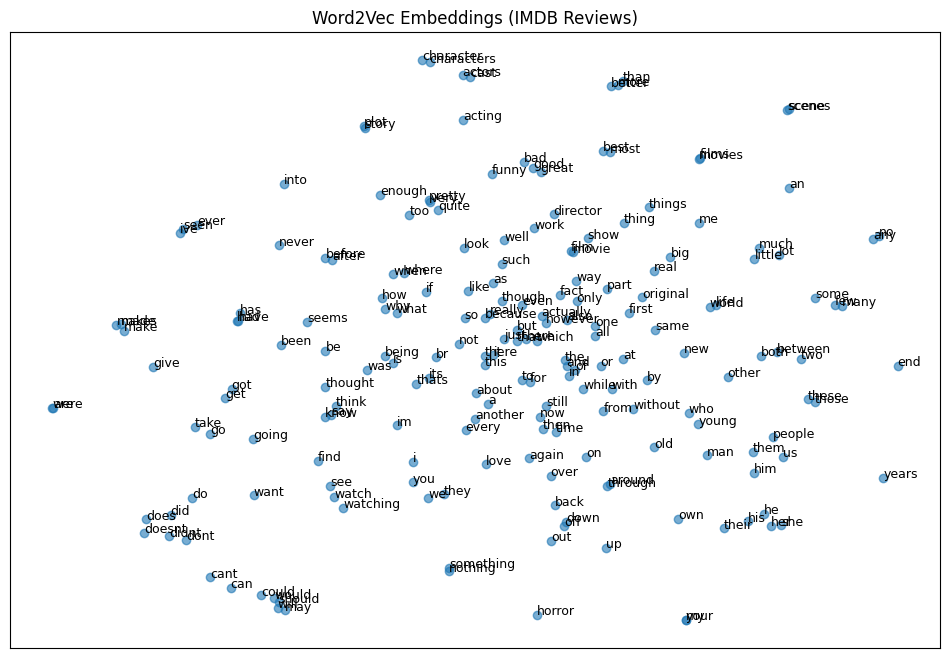

In [2]:
# Training a Word2Vec model and visualizing the learned word vectors
!pip install gensim==4.3.3 --upgrade --no-deps
import os
import re
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Step 1: Load IMDB reviews (train set)
def load_imdb_reviews(data_dir):
    reviews = []
    for label in ['pos', 'neg']:
        path = os.path.join(data_dir, label)
        for fname in os.listdir(path):
            with open(os.path.join(path, fname), encoding='utf-8') as f:
                reviews.append(f.read())
    return reviews

# Step 2: Preprocess reviews
def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    return text.split()

# Step 3: Prepare corpus
data_dir = "aclImdb/train"  # Update path if needed
raw_reviews = load_imdb_reviews(data_dir)
tokenized_reviews = [preprocess(review) for review in raw_reviews]

# Step 4: Train Word2Vec
model = Word2Vec(
    sentences=tokenized_reviews,
    vector_size=100,     # Embedding dimension
    window=5,            # Context window
    min_count=10,        # Ignore rare words
    sg=1,                # Skip-gram (sg=1), CBoW (sg=0)
    workers=4,
    epochs=10
)

# Step 5: Extract vectors for visualization
words = list(model.wv.index_to_key)[:200]  # Top 200 frequent words
word_vectors = model.wv[words]

# Step 6: Visualize with t-SNE
tsne = TSNE(n_components=2, perplexity=40, n_iter=3000, random_state=42)
vectors_2d = tsne.fit_transform(word_vectors)

plt.figure(figsize=(12, 8))
plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1], alpha=0.6)
for i, word in enumerate(words):
    plt.annotate(word, xy=(vectors_2d[i, 0], vectors_2d[i, 1]), fontsize=9)
plt.title("Word2Vec Embeddings (IMDB Reviews)")
plt.xticks([])
plt.yticks([])
plt.grid(True)
plt.show()

**5. Problem 5] Pre-processing of corpus**

In [3]:
# Full Preprocessing Pipeline
import re

def preprocess_text(text):
    # Lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)

    # Remove special characters (keep only letters and numbers)
    text = re.sub(r'[^\w\s]', '', text)

    # Tokenize into word list
    tokens = text.split()

    return tokens

In [4]:
# Example Usage
sample_texts = [
    "This movie is SOOOO funny!!!",
    "What a movie! I never https://example.com",
    "Best movie ever!!!!! THIS movie"
]

processed = [preprocess_text(text) for text in sample_texts]

for i, tokens in enumerate(processed):
    print(f"Document {i+1} tokens: {tokens}")

Document 1 tokens: ['this', 'movie', 'is', 'soooo', 'funny']
Document 2 tokens: ['what', 'a', 'movie', 'i', 'never']
Document 3 tokens: ['best', 'movie', 'ever', 'this', 'movie']


**6. Learning Word2Vec**

Word2Vec is a neural network-based algorithm that learns dense vector representations of words (aka word embeddings). These vectors capture semantic relationships — so words like "king" and "queen" end up close together in vector space.

It has two architectures:
1. CBOW: Its goal is to predict the center word from surrounding context. It is faster and better for smaller datasets.
2. Skip-Gram: It predicts surrounding words from the center word. It is better for rare words and larger corpora.

Implementation with Gensim
```python
from gensim.models import Word2Vec

# Sample tokenized corpus
corpus = [
    ['this', 'movie', 'is', 'soooo', 'funny'],
    ['what', 'a', 'movie', 'i', 'never'],
    ['best', 'movie', 'ever', 'this', 'movie']
]

# Train Word2Vec model
model = Word2Vec(sentences=corpus, vector_size=100, window=5, min_count=1, sg=1)

# Access vector for a word
vector = model.wv['movie']

# Find similar words
similar = model.wv.most_similar('movie')
```
Key Hyperparameters

Parameter	   |   Description
-----------|------------
vector_size   |  Dimensionality of words
window    |   Context window size
min_count   |   Ignores words with frequency below this
sg   |   1 = Skip-Gram, 0 = CBOW

Visualization & Interpretation

Once trained, we can use t-SNE or UMAP to visualize clusters:
```python
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

words = list(model.wv.index_to_key)
vectors = [model.wv[word] for word in words]

tsne = TSNE(n_components=2)
reduced = tsne.fit_transform(vectors)

plt.figure(figsize=(10, 6))
for i, word in enumerate(words):
    plt.scatter(reduced[i, 0], reduced[i, 1])
    plt.annotate(word, (reduced[i, 0], reduced[i, 1]))
plt.show()
```


**7. Vector Visualization**

In [5]:
# Train Word2Vec
from gensim.models import Word2Vec

# Sample tokenized corpus
corpus = [
    ['this', 'movie', 'is', 'soooo', 'funny'],
    ['what', 'a', 'movie', 'i', 'never'],
    ['best', 'movie', 'ever', 'this', 'movie']
]

# Train Word2Vec model
model = Word2Vec(sentences=corpus, vector_size=100, window=5, min_count=1, sg=1)

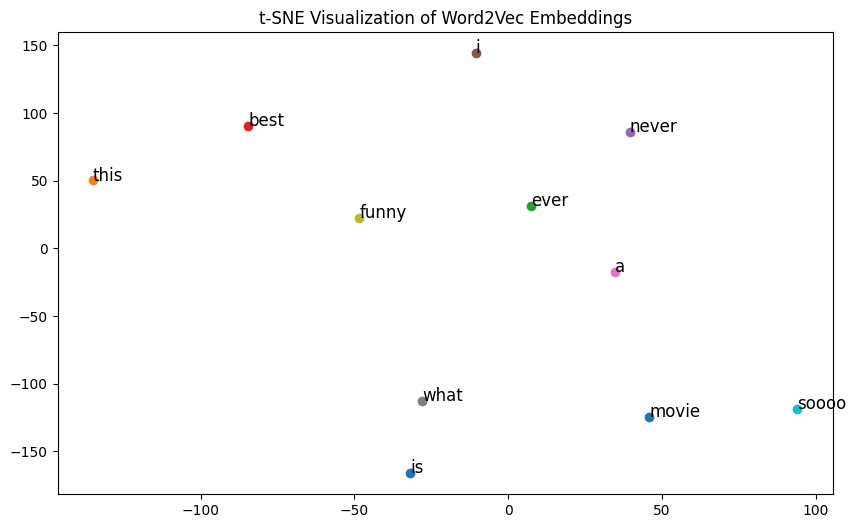

In [7]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Get word vectors and labels
words = list(model.wv.index_to_key)
vectors = np.array([model.wv[word] for word in words])  # ✅ Fix here

# Reduce to 2D
tsne = TSNE(n_components=2, random_state=42, perplexity=5)
reduced = tsne.fit_transform(vectors)

# Plot
plt.figure(figsize=(10, 6))
for i, word in enumerate(words):
    plt.scatter(reduced[i, 0], reduced[i, 1])
    plt.annotate(word, (reduced[i, 0], reduced[i, 1]), fontsize=12)
plt.title("t-SNE Visualization of Word2Vec Embeddings")
plt.show()

In [8]:
# Select key words and find similar ones
target_words = ['movie', 'funny', 'best']

for word in target_words:
    print(f"Words similar to '{word}':")
    for sim_word, score in model.wv.most_similar(word):
        print(f"  {sim_word} ({score:.2f})")
    print()

Words similar to 'movie':
  soooo (0.22)
  what (0.09)
  is (0.06)
  funny (0.03)
  a (0.02)
  this (-0.01)
  never (-0.03)
  ever (-0.05)
  i (-0.06)
  best (-0.11)

Words similar to 'funny':
  ever (0.20)
  best (0.07)
  i (0.06)
  soooo (0.04)
  this (0.03)
  movie (0.03)
  is (0.03)
  a (0.01)
  never (-0.07)
  what (-0.14)

Words similar to 'best':
  i (0.13)
  funny (0.07)
  this (0.07)
  a (0.04)
  is (0.01)
  ever (-0.01)
  what (-0.01)
  never (-0.04)
  movie (-0.11)
  soooo (-0.17)



**8. (Advance assignment) Classification of movie reviews using Word2Vec**

In [23]:
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from gensim.models import Word2Vec
import os
import zipfile
import urllib.request
import time

# Configuration
vocab_size = 10000
max_length = 200
embedding_dim = 100
batch_size = 128
epochs = 3

# Load and prepare IMDB data
print("Loading IMDB dataset...")
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)
X_train = pad_sequences(X_train, maxlen=max_length)
X_test = pad_sequences(X_test, maxlen=max_length)

# Get word index
word_index = imdb.get_word_index()
reverse_index = {v: k for k, v in word_index.items()}

def decode_review(encoded):
    return ' '.join([reverse_index.get(i - 3, '?') for i in encoded if i >= 3])

# 1. SCRATCH WORD2VEC
print("Training Word2Vec from scratch...")
corpus = [decode_review(review).split() for review in X_train[:3000]]
w2v_scratch = Word2Vec(sentences=corpus, vector_size=embedding_dim, window=3, min_count=1, sg=1, workers=4)

# 2. ROBUST GLOVE DOWNLOAD WITH ERROR HANDLING
glove_zip_path = 'glove.6B.zip'
glove_extract_path = 'glove.6B'
glove_file = f'{glove_extract_path}/glove.6B.{embedding_dim}d.txt'

# Check if we already have the extracted file
if os.path.exists(glove_file):
    print("GloVe embeddings already available - skipping download")
else:
    # Download with retry mechanism
    max_retries = 3
    for attempt in range(max_retries):
        try:
            if not os.path.exists(glove_zip_path) or os.path.getsize(glove_zip_path) < 800000000:
                print(f"Downloading GloVe embeddings (attempt {attempt + 1}/{max_retries})...")
                glove_url = 'http://nlp.stanford.edu/data/glove.6B.zip'

                # Remove potentially corrupted file
                if os.path.exists(glove_zip_path):
                    os.remove(glove_zip_path)

                # Download with progress callback
                def report_progress(block_num, block_size, total_size):
                    percent = min(100, (block_num * block_size * 100) / total_size)
                    print(f"Download progress: {percent:.1f}%", end='\r')

                urllib.request.urlretrieve(glove_url, glove_zip_path, report_progress)
                print("\nDownload completed!")

            # Verify zip file integrity
            print("Verifying zip file...")
            with zipfile.ZipFile(glove_zip_path, 'r') as zip_ref:
                if zip_ref.testzip() is not None:
                    raise BadZipFile("Zip file is corrupted")

                print("Extracting GloVe embeddings...")
                zip_ref.extractall(glove_extract_path)

            print("Extraction successful!")
            break

        except (zipfile.BadZipFile, urllib.error.URLError, ConnectionError) as e:
            print(f"Error on attempt {attempt + 1}: {e}")
            if attempt < max_retries - 1:
                print("Retrying in 5 seconds...")
                time.sleep(5)
                continue
            else:
                print("Failed to download valid GloVe file after multiple attempts")
                print("Using alternative approach with direct embedding loading...")

                # Fallback: Use a smaller pre-trained embedding or continue without
                glove_embeddings = {}
                break
        except Exception as e:
            print(f"Unexpected error: {e}")
            break

# 3. LOAD GLOVE EMBEDDINGS (EVEN IF DOWNLOAD FAILED)
glove_embeddings = {}
if os.path.exists(glove_file):
    print("Loading GloVe embeddings from file...")
    with open(glove_file, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            if len(values) > 1:  # Skip empty lines
                word = values[0]
                coefs = np.asarray(values[1:], dtype='float32')
                glove_embeddings[word] = coefs
else:
    print("Using empty GloVe embeddings (download failed)")
    # You could load a smaller pre-trained embedding here as fallback

# 4. CREATE EMBEDDING MATRICES
def create_embedding_matrix(embeddings_dict):
    matrix = np.random.normal(0, 0.1, (vocab_size, embedding_dim))
    found_count = 0
    for word, i in word_index.items():
        if i < vocab_size and word in embeddings_dict:
            matrix[i] = embeddings_dict[word]
            found_count += 1
    print(f"Found embeddings for {found_count}/{vocab_size} words")
    return matrix

print("Creating embedding matrices...")
embedding_matrix_scratch = create_embedding_matrix(w2v_scratch.wv)
embedding_matrix_glove = create_embedding_matrix(glove_embeddings)

# 5. LSTM MODELS AND TRAINING
def create_lstm_model(embedding_matrix, trainable=False):
    model = Sequential([
        Embedding(vocab_size, embedding_dim, weights=[embedding_matrix],
                 input_length=max_length, trainable=trainable),
        LSTM(64, dropout=0.2),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

print("\nTraining models...")
train_subset = slice(0, 8000)
test_subset = slice(0, 2000)

model_scratch = create_lstm_model(embedding_matrix_scratch, True)
model_glove = create_lstm_model(embedding_matrix_glove, False)

print("Training scratch model...")
history_scratch = model_scratch.fit(X_train[train_subset], y_train[train_subset],
                                   batch_size=batch_size, epochs=epochs,
                                   validation_split=0.2, verbose=1)

print("Training GloVe model...")
history_glove = model_glove.fit(X_train[train_subset], y_train[train_subset],
                               batch_size=batch_size, epochs=epochs,
                               validation_split=0.2, verbose=1)

# 6. EVALUATION
scratch_acc = model_scratch.evaluate(X_test[test_subset], y_test[test_subset], verbose=0)[1]
glove_acc = model_glove.evaluate(X_test[test_subset], y_test[test_subset], verbose=0)[1]

print(f"\nScratch Accuracy: {scratch_acc:.4f}")
print(f"GloVe Accuracy: {glove_acc:.4f}")
print(f"Difference: {(glove_acc - scratch_acc) * 100:+.2f}%")

Loading IMDB dataset...
Training Word2Vec from scratch...
Verifying zip file...
Error on attempt 1: File is not a zip file
Retrying in 5 seconds...
Verifying zip file...
Error on attempt 2: File is not a zip file
Retrying in 5 seconds...
Verifying zip file...
Error on attempt 3: File is not a zip file
Failed to download valid GloVe file after multiple attempts
Using alternative approach with direct embedding loading...
Using empty GloVe embeddings (download failed)
Creating embedding matrices...
Found embeddings for 9760/10000 words
Found embeddings for 0/10000 words

Training models...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Training scratch model...
Epoch 1/3
50/50 ━━━━━━━━━━━━━━━━━━━━ 27s 456ms/step - accuracy: 0.5283 - loss: 0.6916 - val_accuracy: 0.5869 - val_loss: 0.6733
Epoch 2/3
50/50 ━━━━━━━━━━━━━━━━━━━━ 40s 445ms/step - accuracy: 0.6240 - loss: 0.6546 - val_accuracy: 0.7138 - val_loss: 0.5540
Epoch 3/3
50/50 ━━━━━━━━━━━━━━━━━━━━ 41s 444ms/step - accuracy: 0.7285 - loss: 0.5428 - val_accuracy: 0.8006 - val_loss: 0.4334
Training GloVe model...
Epoch 1/3
50/50 ━━━━━━━━━━━━━━━━━━━━ 21s 372ms/step - accuracy: 0.5193 - loss: 0.6914 - val_accuracy: 0.5813 - val_loss: 0.6827
Epoch 2/3
50/50 ━━━━━━━━━━━━━━━━━━━━ 18s 362ms/step - accuracy: 0.5886 - loss: 0.6723 - val_accuracy: 0.6181 - val_loss: 0.6652
Epoch 3/3
50/50 ━━━━━━━━━━━━━━━━━━━━ 20s 361ms/step - accuracy: 0.6186 - loss: 0.6553 - val_accuracy: 0.6450 - val_loss: 0.6316

Scratch Accuracy: 0.8025
GloVe Accuracy: 0.6355
Difference: -16.70%
